In [1]:
from chimeraTreeDemo import chimeraTree2D
from chimeraTreeDemo import meshBuilder
import matplotlib.pyplot as plt
import numpy as np

format_ = "svg"
dpi=240
x_sep = 1

to_shift_ = meshBuilder.SimplexMeshShifted.from_SimplexMesh

chimera = chimeraTree2D.ChimeraTree2D(h0=1 / 1024 * 1 / 2**4, Lx=8, Ly=8)
print(chimera.n_meshes)
if hasattr(chimera, "coons"):
    print(len(chimera.conns))

mesh, b = meshBuilder.buildMesh_tri_cylinder_gmsh([-0.5, 0], 0.5, 0.8, 0.1, 0.04)
# mesh, b = meshBuilder.buildMesh_tri_rect_gmsh([0, -1], (10, 1), (10 + 2, 1 + 2.05), 0.2, 0.08)
chimera.add_tri_mesh(chimeraTree2D.FGMesh(to_shift_(mesh), b))

mesh, b = meshBuilder.buildMesh_tri_cylinder_gmsh([0.5, 0], 0.5, 0.8, 0.1, 0.04)
# mesh, b = meshBuilder.buildMesh_tri_cylinder_gmsh([0, 0], 0.5, 0.8, 0.1, 0.04)
# mesh, b = meshBuilder.buildMesh_tri_rect_gmsh([1, 0], (0.5, 0.5), (0.8, 0.8), 0.1, 0.04)

chimera.add_tri_mesh(chimeraTree2D.FGMesh(to_shift_(mesh), b))

# meshS = meshBuilder.SimplexMeshShifted(mesh.nodes, mesh.simplices)
# meshS.off[:] = [1, 0]
# chimera.add_tri_mesh(chimeraTree2D.FGMesh(meshS, b))

0
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 30%] Meshing curve 2 (Circle)
Info    : [ 60%] Meshing curve 3 (Circle)
Info    : [ 80%] Meshing curve 4 (Circle)
Info    : Done meshing 1D (Wall 0.000364508s, CPU 0s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0120342s, CPU 0.049568s)
Info    : 409 nodes 821 elements
Triangle 3
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 30%] Meshing curve 2 (Circle)
Info    : [ 60%] Meshing curve 3 (Circle)
Info    : [ 80%] Meshing curve 4 (Circle)
Info    : Done meshing 1D (Wall 0.000195907s, CPU 0.000237s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00713676s, CPU 0.007128s)
Info    : 409 nodes 821 elements
Triangle 3


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


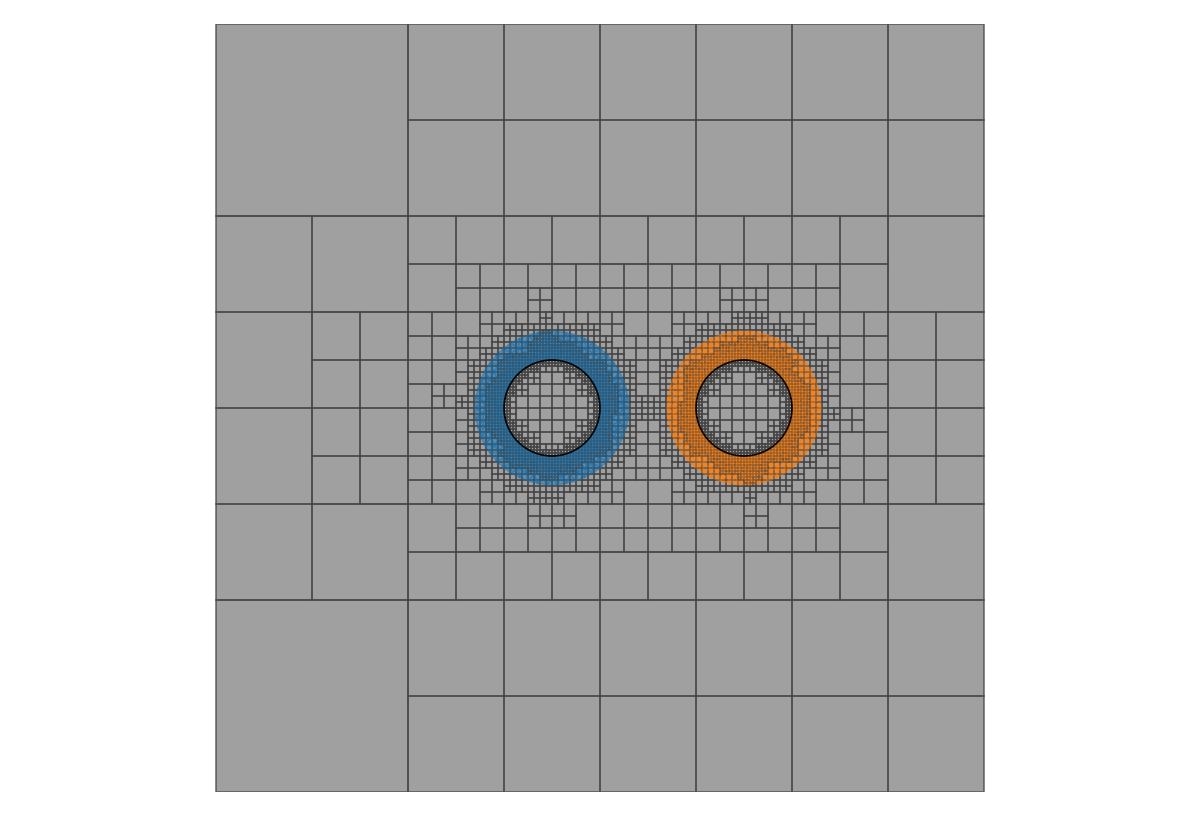

In [2]:
chimera.meshes[1].mesh.off[:] = [x_sep, 0]
chimera.refine_meshB()
chimera.build_cell_conn()
chimera.chimeraHole(gap=0.0)
# print(chimera.conns[0])
from chimeraTreeDemo import meshPlotUtils

fig = plt.figure(123, figsize=(6, 4),dpi=dpi)
ax = fig.add_subplot()
chimera.plot_holes(ax=ax)
# meshPlotUtils.plot_mesh_mono(
#     chimera.meshB,
#     ax=ax,
#     cell_mask=chimera.fluid_solid_B == -1,
# )
# mesh = chimera.meshes[0]
# mesh.mesh.plot_image(ax=ax, v=mesh.d, v_type="N")

xc, yc = 0, 0
hsee = 4
ax.set_ylim([yc - hsee, yc + hsee])
ax.set_xlim([xc - hsee, xc + hsee])
ax.set_aspect(1, adjustable='datalim')

# ax.plot(0.11,0.485, ".")
# print(chimera.meshB.get_containing_cells([[0.11, 0.485]]))
ax.axis("off")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.savefig(f"pics/demo1_full_x{x_sep:.1f}.{format_}")

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


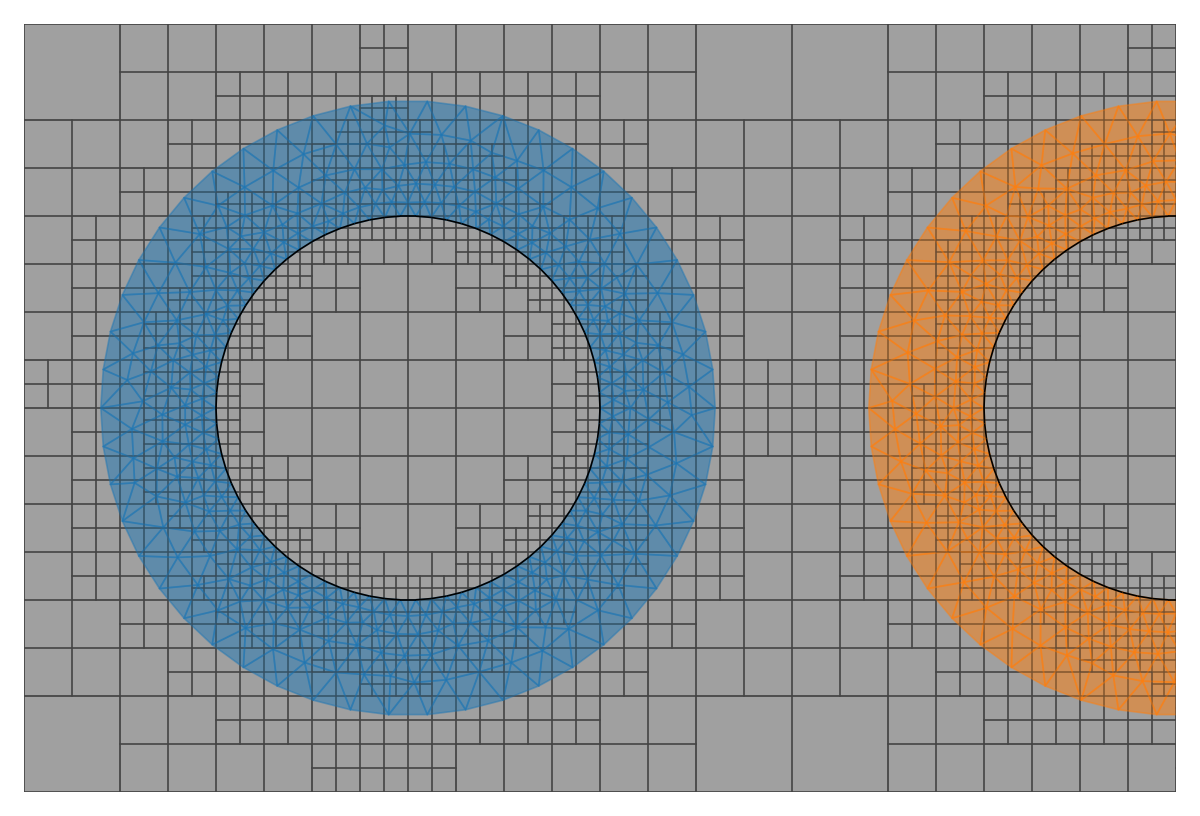

In [3]:
fig = plt.figure(124, figsize=(6, 4), dpi=dpi)
ax = fig.add_subplot()
chimera.plot_holes(ax=ax)
# meshPlotUtils.plot_mesh_mono(
#     chimera.meshB,
#     ax=ax,
#     cell_mask=chimera.fluid_solid_B == -1,
# )
# mesh = chimera.meshes[0]
# mesh.mesh.plot_image(ax=ax, v=mesh.d, v_type="N")

xc, yc = 0, 0
hsee = 1
ax.set_ylim([yc - hsee, yc + hsee])
ax.set_xlim([xc - hsee, xc + hsee])
ax.set_aspect(1, adjustable="datalim")

# ax.plot(0.11,0.485, ".")
# print(chimera.meshB.get_containing_cells([[0.11, 0.485]]))
ax.axis("off")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.savefig(f"pics/demo1_close_x{x_sep:.1f}.{format_}")

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


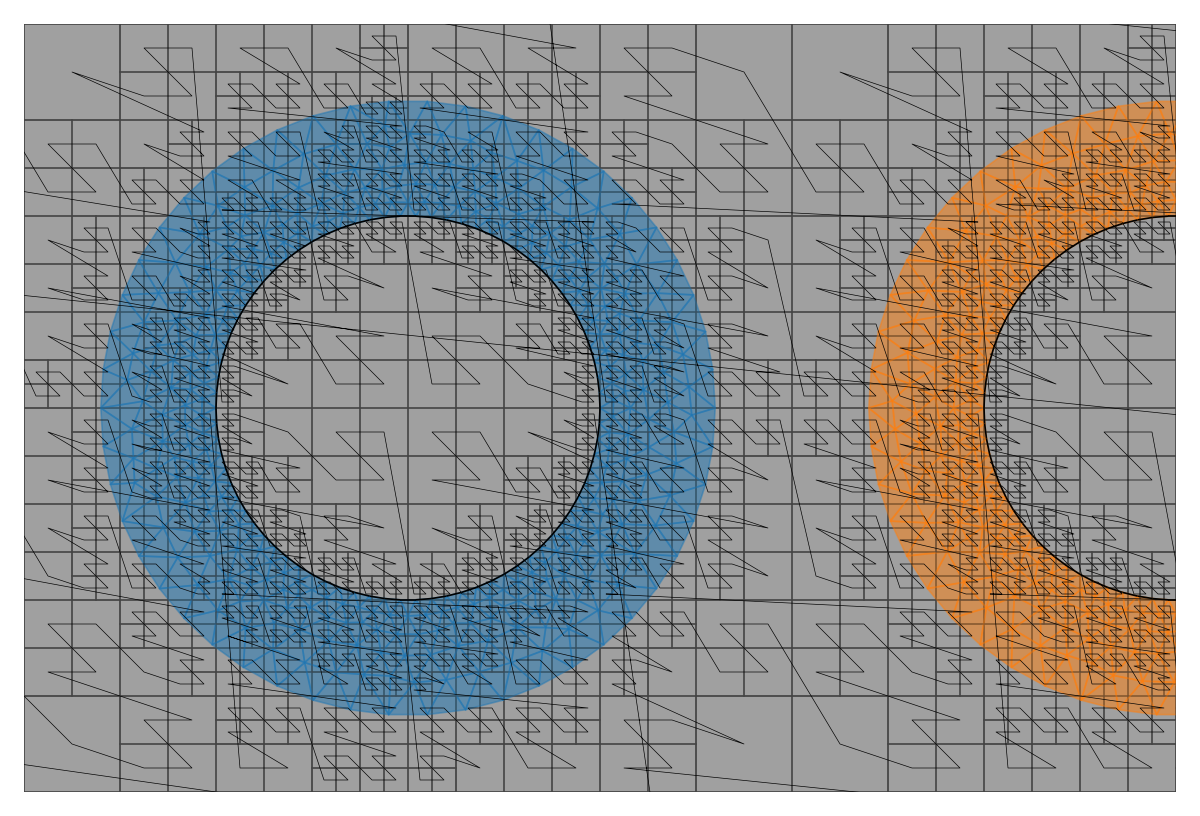

In [4]:
fig = plt.figure(125, figsize=(6, 4), dpi=dpi)
ax = fig.add_subplot()
chimera.plot_holes(ax=ax, cell_line=True)
# meshPlotUtils.plot_mesh_mono(
#     chimera.meshB,
#     ax=ax,
#     cell_mask=chimera.fluid_solid_B == -1,
# )
# mesh = chimera.meshes[0]
# mesh.mesh.plot_image(ax=ax, v=mesh.d, v_type="N")

xc, yc = 0, 0
hsee = 1
ax.set_ylim([yc - hsee, yc + hsee])
ax.set_xlim([xc - hsee, xc + hsee])
ax.set_aspect(1, adjustable="datalim")

# ax.plot(0.11,0.485, ".")
# print(chimera.meshB.get_containing_cells([[0.11, 0.485]]))
ax.axis("off")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.savefig(f"pics/demo1_close_fill_x{x_sep:.1f}.{format_}")

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


[0 5 0 1 5 5 4 0 1 1 4 4 0 4 4 4 0 5 1 4 4 1 0 4 5 4 4 1 2 4 2 1 1 1 5 1 1
 0 5 0 1 4 4 4 1 4 4 5 2 5 5 5 0 4 2 4 0 2 1 1 4 5 4 5 4 4 0 1 5 0 1 0 1 2
 4 0 0 4 0 5 0 5 0 1 4 5 0 1 2 0 4 4 5 5 4 4 5 4 5 5 4 1 0 1 0 1 1 5 4 5 4
 0 1 2 1 5 0 1 4 1 0 4 0 1 4 1 5 5 0 5 1 1 5 4 0 5 0 1 1 4 1 2 0 5 4 0 5 4
 4 0 1 4 1 1 4 4 1 2 5 4 0 1 5 5 1 4 1 5 1 1 1 5 5 5 0 5 2 4 5 0 1 4 0 1 0
 5 4 1 5 0 1 4 2 4 0 5 2 4 5 4 6 0 4 1 2 5 0 5 4 1 0 1 2 5 4 5 4 0 5 0 1 0
 1 0 5 5 0 0 5 4 2 4 1 4 5 4 2 0 1 0 5 5 0 5 4 4 5 0 5 1 4 5 0 4 0 5 1 0 0
 0 5 0 4 1 0 0 0 1 5 4 2 5 2 1 1 2 1 4 4 4 2 0 4 1 4 5 0 1 4 0 1 0 4 0 5 4
 0 1 4 5 4 4 0 1 4 5 4 4 0 6 4 1 5 4 1 4 2 4 4 5 4 4 0 4 0 1 4 4 0 4 5 2 0
 1 4 0 1 0 1 1 1 4 1 5 0 2 5 5 1 5 4 1 0 4 1 1 1 4 0 0 5 5 5 1 5 4 1 5 4 4
 5 5 1 4 0 0 5 5 1 4 5 2 2 5 4 1 0 1 1 1 4 1 4 1 4 4 1 1 0 1 1 4 1 4 1 1 0
 1 4 1 1 1 4 1 4 0 0 5 2 4 5 4 2 5 4 2 1 1 4 1 1 4 4 4 1 4 4 1 1 4 4 1 5 4
 4 1 4 4 4 1 5 1 1 1 4 4 4 1 4 1 1 4 4 1 4 4 1 4 4 1 0 5 4 1 4 4 0 4 0 4 0
 4 4 1 1 4 4 1 4 4 1 4 5 

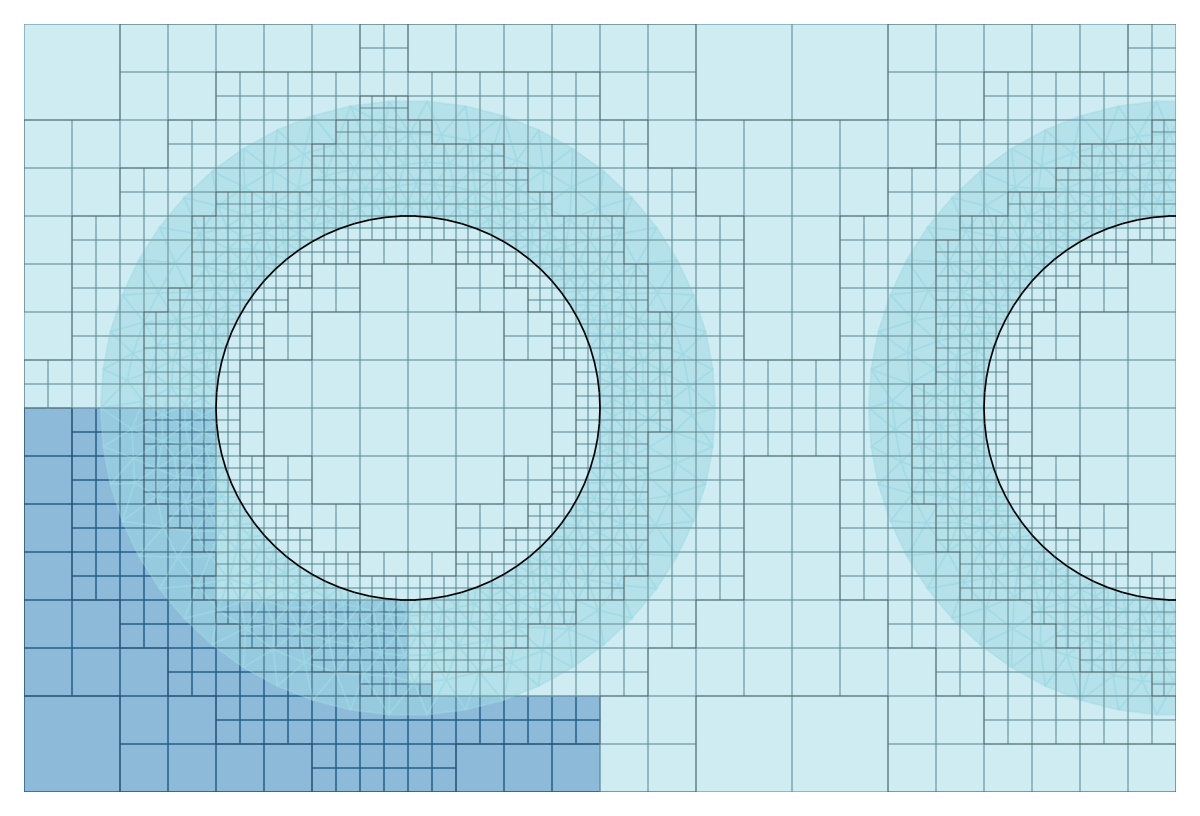

In [ ]:
chimera.chimeraPart(8)
print(chimera.parts[0])


fig = plt.figure(126, figsize=(6, 4), dpi=dpi)
ax = fig.add_subplot()
chimera.plot_parts(ax=ax)

xc, yc = 0, 0
hsee = 1
ax.set_ylim([yc - hsee, yc + hsee])
ax.set_xlim([xc - hsee, xc + hsee])
ax.set_aspect(1, adjustable="datalim")

# ax.plot(0.11,0.485, ".")
# print(chimera.meshB.get_containing_cells([[0.11, 0.485]]))
ax.axis("off")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.savefig(f"pics/demo1_close_part_x{x_sep:.1f}.{format_}")